In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import wfdb
import glob
from wfdb import processing
import scipy
from scipy import *
sns.set()

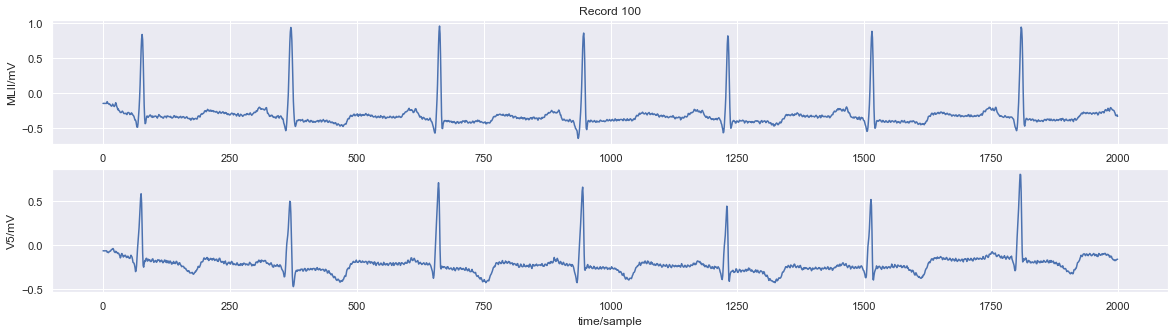

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 2000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.32 , -0.165],
        [-0.31 , -0.16 ],
        [-0.33 , -0.16 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [995, 1011],
 'checksum': [20374, 62756],
 'block_size': [0, 0]}

In [2]:
record = wfdb.rdrecord('./mit-bih/100', sampto=2000)
wfdb.plot_wfdb(record, title='Record 100',figsize=(20,5))
display(record.__dict__)

In [3]:
data_files = glob.glob('./mit-bih/*.atr')
data_files = [i[:-4] for i in data_files]
data_files.sort()
print(data_files)

['./mit-bih\\100', './mit-bih\\101', './mit-bih\\102', './mit-bih\\103', './mit-bih\\104', './mit-bih\\105', './mit-bih\\106', './mit-bih\\107', './mit-bih\\108', './mit-bih\\109', './mit-bih\\111', './mit-bih\\112', './mit-bih\\113', './mit-bih\\114', './mit-bih\\115', './mit-bih\\116', './mit-bih\\117', './mit-bih\\118', './mit-bih\\119', './mit-bih\\121', './mit-bih\\122', './mit-bih\\123', './mit-bih\\124', './mit-bih\\200', './mit-bih\\201', './mit-bih\\202', './mit-bih\\203', './mit-bih\\205', './mit-bih\\207', './mit-bih\\208', './mit-bih\\209', './mit-bih\\210', './mit-bih\\212', './mit-bih\\213', './mit-bih\\214', './mit-bih\\215', './mit-bih\\217', './mit-bih\\219', './mit-bih\\220', './mit-bih\\221', './mit-bih\\222', './mit-bih\\223', './mit-bih\\228', './mit-bih\\230', './mit-bih\\231', './mit-bih\\232', './mit-bih\\233', './mit-bih\\234']


In [6]:
classes = ['N','R','L','V','A','E']
record_nums =[]
record_names = []
num_beats =[]

for i in range(len(data_files)):
    signals, fields = wfdb.rdsamp(data_files[i])
    annotation = wfdb.rdann(data_files[i], 'atr')
    record_nums.append(i)
#   record_names.append(data_files[i])
    for j in classes:
        ids = np.in1d(annotation.symbol, j)
        beats = annotation.sample[ids]
        num_beats.append(len(beats))
        
n_vals = num_beats[::6]
r_vals = num_beats[1::6]
l_vals = num_beats[2::6]
v_vals = num_beats[3::6]
a_vals = num_beats[4::6]
e_vals = num_beats[5::6]

dict_values([75052, 2546, 7130, 33, 7028, 982, 803, 229, 8075, 150, 83, 7259, 106, 2, 16])


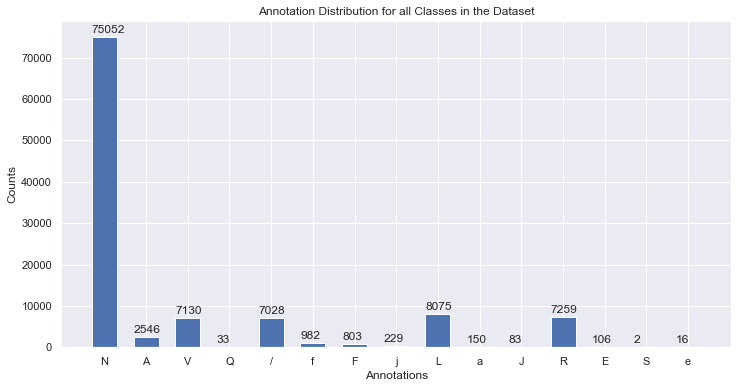

In [10]:
import wfdb as wf
import numpy as np
import glob
from matplotlib import pyplot as plt
from biosppy.signals import ecg
from scipy import signal

def extract_data():
    data_files = glob.glob('./mit-bih/*.atr')
    data_files = [i[:-4] for i in data_files]
    data_files.sort()
    return data_files

files = extract_data()
i=0

good_beats =['N','L','R','B','A','a','J','S','V','r',
             'F','e','j','n','E','/','f','Q','?']
list_anns = []

for i in range(len(files)):
    datfile = files[i]
    record = wf.rdsamp(datfile)
    ann = wf.rdann(datfile, 'atr')
    list_anns.extend(ann.symbol)

dict_anns = {}

for i in list_anns:
    dict_anns[i] = dict_anns.get(i,0)+1
    
dict_anns = {k:v for k,v in dict_anns.items() if k in good_beats}

print(dict_anns.values())

plt.figure(figsize=(12,6))

xlocs, xlabs = plt.xticks()
barplt = plt.bar(list(dict_anns.keys()),dict_anns.values(),width = .6)
xlocs = [j for j in dict_anns.keys()]
ylabs = [j for j in dict_anns.values()]

plt.title('Annotation Distribution for all Classes in the Dataset')
plt.xlabel('Annotations')
plt.ylabel('Counts')

for bar in barplt:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+1000, yval)
    
plt.show()

In [16]:
# import wfdb as wf
# import glob
# import numpy as np
# from matplotlib import pyplot as plt
# from biosppy.signals import ecg
# from scipy import signal

# def extract_data():
#     data_files = glob.glob('./mit-bih/*.atr')
#     data_files = [i[:-4] for i in data_files]
#     data_files.sort()
#     return data_files

# files = extract_data()

# i=4 #file number 0-47
# channel_num=1 # There are 2 channels
# samplestart =0 # Start of the sample in the file.
# samplesize=3000 # Number of readings (360 per second)
# sampleend = samplestart + samplesize #End of sample in the file.

# datfile = files[i]
# record = wf.rdsamp(datfile)
# ann = wf.rdann(datfile, 'atr')

# # Get data and anns for the samples selected below.
# channel = record[0][samplestart:sampleend, channel_num]

# # Plot the heart beats. Time scale is number of readings
# # divided by sampling frequency.
# time_scale = (np.arange(samplesize, dtype = 'float') + samplestart) / record[1].get('fs')
# plt.figure(figsize=(15,5))
# plt.plot(time_scale, channel)

# # Extract anns.
# location_p = np.logical_and(ann.sample >= samplestart, ann.sample < sampleend)
# anns = ann.sample[location_p] - samplestart
# annotypes = np.array(ann.symbol)
# annotypes = annotypes[location_p]

# # Plot the anns.
# annotimes = time_scale[anns]
# plt.plot(annotimes, np.ones_like(annotimes) * channel.max() * 1.4, 'ro')

# # ann codes.
# for ind, annot in enumerate(anns):
#     plt.annotate(annotypes[ind], xy = (time_scale[annot], channel.max() * 1.1))

# plt.xlim([samplestart / record[1].get('fs'), (sampleend / record[1].get('fs')) + 1])
# plt.xlabel('Offset')
# plt.ylabel(record[1].get('sig_name')[channel_num])
# plt.title('record: '+datfile[-3:]+'    channel: '+record[1].get('sig_name')[channel_num])
# plt.show()

In [17]:
import wfdb as wf
import numpy as np
import glob
from matplotlib import pyplot as plt
from biosppy.signals import ecg
from scipy import signal

def extract_data():
    data_files = glob.glob('./mit-bih/*.atr')
    data_files = [i[:-4] for i in data_files]
    data_files.sort()
    return data_files

records = extract_data()
print('Total files: ', len(records))

# Instead of using the annotations to find the beats, we will
# use R-peak detection instead. The reason for this is so that
# the same logic can be used to analyze new and un-annotated
# ECG data. We use the annotations here only to classify the
# beat as either Normal or Abnormal and to train the model.
# Reference:
# https://physionet.org/physiobank/database/html/mitdbdir/intro.htm

good_beats = ['N','L','R','B','A','a','J','S','V','r',
             'F','e','j','n','E','/','f','Q','?']

# Loop through each input file. Each file contains one
# record of ECG readings, sampled at 360 readings per
# second.


for path in records:
    pathpts = path.split('/')
    fn = pathpts[-1]
    print('Loading file:', path)

    # Read in the data
    record = wf.rdsamp(path)
    annotation = wf.rdann(path, 'atr')

    # Print some meta informations
    print('    Sampling frequency used for this record:', record[1].get('fs'))
    print('    Shape of loaded data array:', record[0].shape)
    print('    Number of loaded annotations:', len(annotation.num))
    
    # Get the ECG values from the file.
    data = record[0].transpose()

    # Generate the classifications based on the annotations.
    # 0.0 = undetermined
    # 1.0 = normal
    # 2.0 = LBBBB
    # 3.0 = RBBBB
    # 4.0 = Premature Ventricular contraction
    # 5.0 = Atrial Premature beat
    # 6.0 = Fusion ventricular normal beat
    # 7.0 = Fusion of paced and normal beat
    # 8.0 = paced beat
    
    clas = np.array(annotation.symbol)
    rate = np.zeros_like(clas, dtype='float')
    for clasid, clasval in enumerate(clas):
        if (clasval == 'N'):
            rate[clasid] = 1.0 # Normal
        elif (clasval == 'L'):
            rate[clasid] = 2.0 # LBBBB
        elif (clasval == 'R'):
            rate[clasid] = 3.0 # RBBBB
        elif (clasval == 'V'):
            rate[clasid] = 4.0 # Premature Ventricular contraction
        elif (clasval == 'A'):
            rate[clasid] = 5.0 # Atrial Premature beat
        elif (clasval == 'F'):
            rate[clasid] = 6.0 # Fusion ventricular normal beat
        elif (clasval == 'f'):
            rate[clasid] = 7.0 # Fusion of paced and normal beat
        elif (clasval == '/'):
            rate[clasid] = 8.0 # paced beat
            
    rates = np.zeros_like(data[0], dtype='float')
    rates[annotation.sample] = rate
    
    indices = np.arange(data[0].size, dtype='int')

    # Manipulate both channels
    for channelid, channel in enumerate(data):
        chname = record[1].get('sig_name')[channelid]
        print('    ECG channel type:', chname)
        
        # Find rpeaks in the ECG data. Most should match with
        # the annotations.
        out = ecg.ecg(signal=channel, sampling_rate=360, show=False)
        rpeaks = np.zeros_like(channel, dtype='float')
        rpeaks[out['rpeaks']] = 1.0
        
        discard_beats = np.array([0])

        # Split into individual heartbeats. For each heartbeat
        # record, append classification.
        beats = np.split(channel, out['rpeaks'])
        for ind, ind_val in enumerate(out['rpeaks']):
            beat_start = ind == 0
            beat_end = ind == len(beats) - 1

            # Skip start and end beat.
            if (beat_start or beat_end):
                continue

            # Get the classification value that is on
            # or near the position of the rpeak index.
            from_ind = 0 if ind_val < 10 else ind_val - 10
            to_ind = ind_val + 10
            clasval = rates[from_ind:to_ind].max()
            
            # Skip beat if there is no classification.
            if (clasval == 0.0):
                discard_beats = np.append(discard_beats, ind)
                continue

            # Append some extra readings from next beat.
            beats[ind] = np.append(beats[ind][80:], beats[ind+1][:180])

            # Normalize the data
            #beats[ind] = (beats[ind] - beats[ind].min()) / (beats[ind].max() - beats[ind].min())
            
            # Standardize the data
            beats[ind] = ((beats[ind] - np.mean(beats[ind])) / np.std(beats[ind]))
            
            # Resample from 360Hz to 125Hz
            newsize = int(beats[ind].size * 125 / 360)
            beats[ind] = signal.resample(beats[ind], newsize)

            # Skipping records that are too long.
            if (beats[ind].size > 187):
                discard_beats = np.append(discard_beats, ind)
                continue

            # Pad with zeroes.
            zerocount = 187 - beats[ind].size
            beats[ind] = np.pad(beats[ind], (0, zerocount), 'constant', constant_values=(0.0, 0.0))

            # Append the classification to the beat data.
            beats[ind] = np.append(beats[ind], clasval)
            
            # Append the record number to the beat data.
            beats[ind] = np.append(beats[ind], fn[-3:])

        discard_beats = np.append(discard_beats, len(beats)-1)

        # Remove first and last beats and the ones without classification.
        beats = np.delete(beats, discard_beats)

        # Save to CSV file.

        savedata = np.array(list(beats[:]), dtype=np.float)
        outfn = './'+fn+'_'+chname+'.csv'
        print('    Generating ', outfn)
        with open(outfn, "wb") as fin:
            np.savetxt(fin, savedata, delimiter=",", fmt='%f')

Total files:  48
Loading file: ./mit-bih\100
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2274
    ECG channel type: MLII


c:\users\shour\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


    Generating  ./mit-bih\100_MLII.csv
    ECG channel type: V5
    Generating  ./mit-bih\100_V5.csv
Loading file: ./mit-bih\101
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 1874
    ECG channel type: MLII
    Generating  ./mit-bih\101_MLII.csv
    ECG channel type: V1
    Generating  ./mit-bih\101_V1.csv
Loading file: ./mit-bih\102
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2192
    ECG channel type: V5
    Generating  ./mit-bih\102_V5.csv
    ECG channel type: V2
    Generating  ./mit-bih\102_V2.csv
Loading file: ./mit-bih\103
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2091
    ECG channel type: MLII
    Generating  ./mit-bih\103_MLII.csv
    ECG channel type: V2
    Generating  ./mit-bih\103_V2.csv
Loading file: ./mit-bih\104
    Samplin

    Generating  ./mit-bih\208_MLII.csv
    ECG channel type: V1
    Generating  ./mit-bih\208_V1.csv
Loading file: ./mit-bih\209
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 3052
    ECG channel type: MLII
    Generating  ./mit-bih\209_MLII.csv
    ECG channel type: V1
    Generating  ./mit-bih\209_V1.csv
Loading file: ./mit-bih\210
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2685
    ECG channel type: MLII
    Generating  ./mit-bih\210_MLII.csv
    ECG channel type: V1
    Generating  ./mit-bih\210_V1.csv
Loading file: ./mit-bih\212
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2763
    ECG channel type: MLII
    Generating  ./mit-bih\212_MLII.csv
    ECG channel type: V1
    Generating  ./mit-bih\212_V1.csv
Loading file: ./mit-bih\213
    Sam

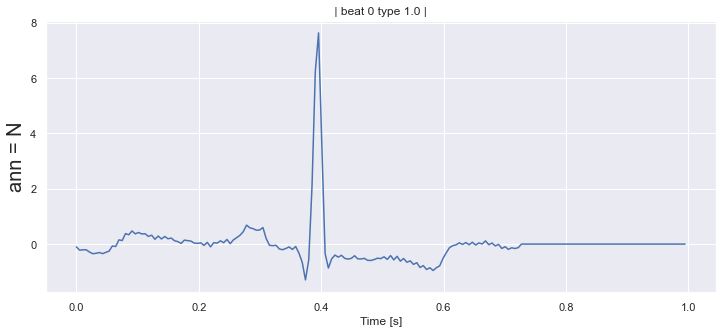

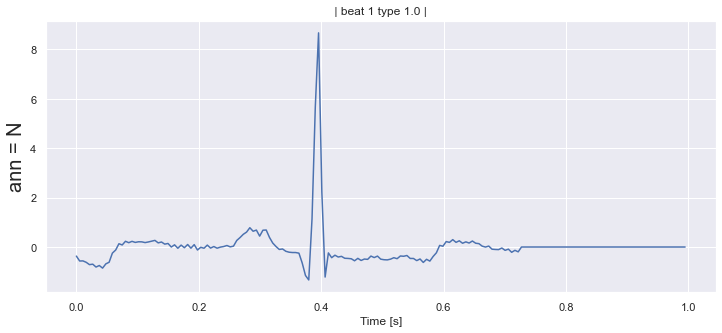

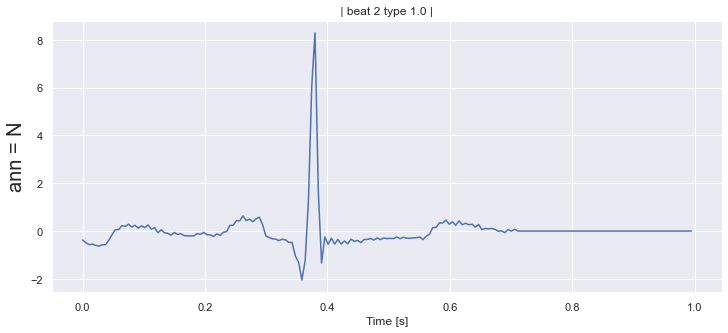

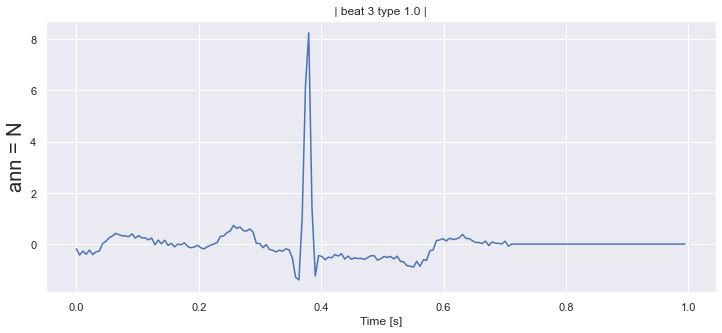

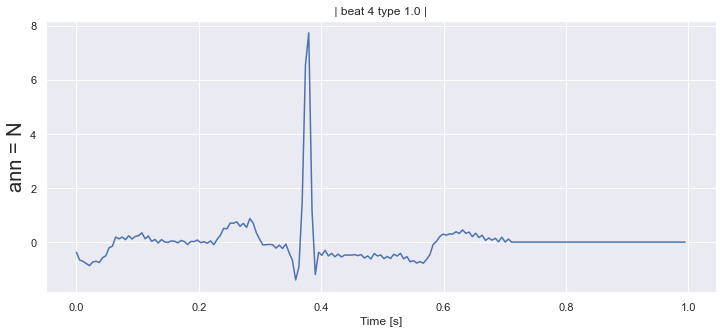

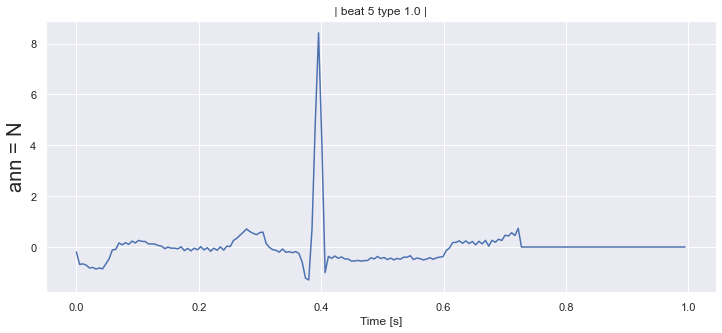

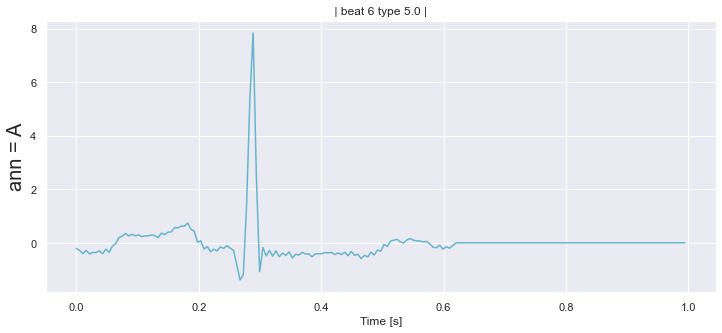

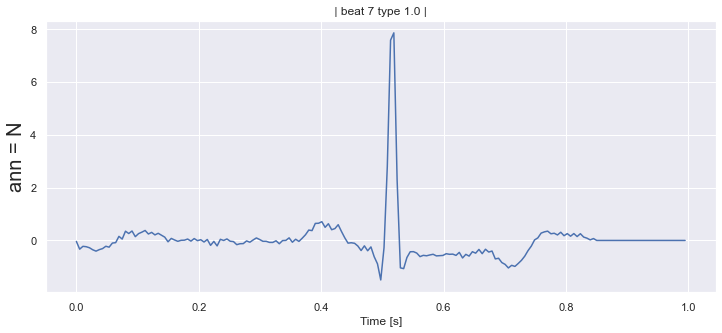

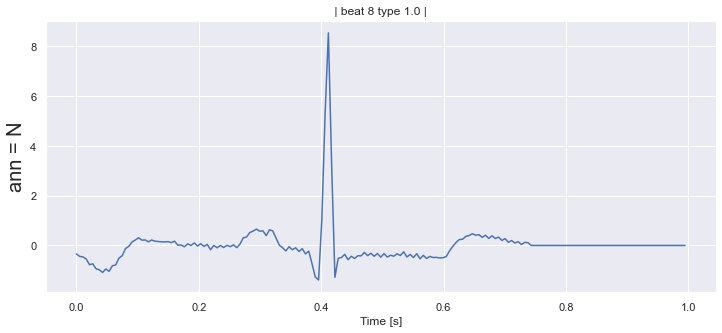

In [18]:
csv_data = np.loadtxt('./mit-bih/100_MLII.csv', delimiter=',')

beat_num = [0,1,2,3,4,5,6,7,8]

for beatid in beat_num:
    times = np.arange(187, dtype = 'float') / 187
    beat = csv_data[beatid][:-2]
    anno = csv_data[beatid][-2]
    
    plt.figure(figsize=(12,5))
    
    if (anno == 1.0):
        plt.plot(times, beat, 'b')
        plt.ylabel('ann = N', size=20)
    elif(anno == 2.0):
        plt.plot(times, beat, 'r')
        plt.ylabel('ann = L', size=20)
    elif(anno == 3.0):
        plt.plot(times, beat, 'g')
        plt.ylabel('ann = R', size=20)
    elif(anno == 4.0):
        plt.plot(times, beat, 'y')
        plt.ylabel('ann = V', size=20)
    elif(anno == 5.0):
        plt.plot(times, beat, 'c')
        plt.ylabel('ann = A', size=20)
    elif(anno == 6.0):
        plt.plot(times, beat, 'm')
        plt.ylabel('ann = F', size=20)
    elif(anno == 7.0):
        plt.plot(times, beat, 'k')
        plt.ylabel('ann = f', size=20)
    elif(anno == 8.0):
        plt.plot(times, beat, 'm')
        plt.ylabel('ann = /', size=20)
        
    plt.xlabel('Time [s]')
    plt.title(' | beat ' + str(beatid) + " type " + str(anno)+' | ')
    plt.show()

## Generate the classifications based on the annotations.

* 0.0 = undetermined
* N = 1.0 = normal
* L = 2.0 = LBBBB
* R = 3.0 = RBBBB
* V = 4.0 = Premature Ventricular contraction
* A = 5.0 = Atrial Premature beat
* F = 6.0 = Fusion ventricular normal beat
* f = 7.0 = Fusion of paced and normal beat
* / = 8.0 = paced beat

https://www.frontiersin.org/articles/10.3389/fphy.2019.00103/full

https://arxiv.org/pdf/2007.02052.pdf

In [13]:
alldata = np.empty(shape=[0, 189])
print(alldata.shape)
all_csvs = glob.glob('./mit-bih/*.csv')
for j in all_csvs:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    alldata = np.append(alldata, csvrows, axis=0)
    
print(alldata.shape)

(0, 189)
Loading  ./mit-bih\100_MLII.csv
Loading  ./mit-bih\100_V5.csv
Loading  ./mit-bih\101_MLII.csv
Loading  ./mit-bih\101_V1.csv
Loading  ./mit-bih\102_V2.csv
Loading  ./mit-bih\102_V5.csv
Loading  ./mit-bih\103_MLII.csv
Loading  ./mit-bih\103_V2.csv
Loading  ./mit-bih\104_V2.csv
Loading  ./mit-bih\104_V5.csv
Loading  ./mit-bih\105_MLII.csv
Loading  ./mit-bih\105_V1.csv
Loading  ./mit-bih\106_MLII.csv
Loading  ./mit-bih\106_V1.csv
Loading  ./mit-bih\107_MLII.csv
Loading  ./mit-bih\107_V1.csv
Loading  ./mit-bih\108_MLII.csv
Loading  ./mit-bih\108_V1.csv
Loading  ./mit-bih\109_MLII.csv
Loading  ./mit-bih\109_V1.csv
Loading  ./mit-bih\111_MLII.csv
Loading  ./mit-bih\111_V1.csv
Loading  ./mit-bih\112_MLII.csv
Loading  ./mit-bih\112_V1.csv
Loading  ./mit-bih\113_MLII.csv
Loading  ./mit-bih\113_V1.csv
Loading  ./mit-bih\114_MLII.csv
Loading  ./mit-bih\114_V5.csv
Loading  ./mit-bih\115_MLII.csv
Loading  ./mit-bih\115_V1.csv
Loading  ./mit-bih\116_MLII.csv
Loading  ./mit-bih\116_V1.csv
Loa

In [14]:
print(alldata.shape)

from sklearn.model_selection import train_test_split
train, test = train_test_split(alldata,test_size=0.25,random_state=48)

print(train.shape)
print(test.shape)

(144991, 189)
(108743, 189)
(36248, 189)


In [16]:
from sklearn.utils import resample

# alldata = np.empty(shape=[0, 189])
# print(alldata.shape)
# all_csvs = glob.glob('./mit-bih/*.csv')
# for j in all_csvs:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     alldata = np.append(alldata, csvrows, axis=0)
    
# # create vector of random numbers, for recognizing patients.
# # each sample should have information of the record number.
# # add a column of the record number to identify the patient.

# print(alldata.shape)

N = train[train[:,-2]==1.0]
L = train[train[:,-2]==2.0]
R = train[train[:,-2]==3.0]
V = train[train[:,-2]==4.0]
A = train[train[:,-2]==5.0]
F = train[train[:,-2]==6.0]
f = train[train[:,-2]==7.0]
I = train[train[:,-2]==8.0]

seed=42
np.random.seed(seed)
def downsample(arr, n, seed):
    downsampled = resample(arr,replace=False,n_samples=n, random_state=seed)
    return downsampled

def upsample(arr, n, seed):
    upsampled = resample(arr,replace=True,n_samples=n,random_state=seed)
    return upsampled

all_class = [N,L,R,V,A,F,f,I]
abn_class = [L,R,V,A,F,f,I]

mean_val = np.mean([len(i) for i in abn_class], dtype= int)
train_sampled = []

for i in all_class:
    if i.shape[0]> mean_val:
        i = downsample(i,mean_val,seed)
    elif i.shape[0]< mean_val:
        i = upsample(i, mean_val,seed)
    train_sampled.append(i)
    
train_sampled = np.concatenate(train_sampled)
np.random.shuffle(train_sampled)
train_sampled_all = train_sampled

with open('train_sampled_all.csv', "wb") as fin:
    np.savetxt(fin, train_sampled_all, delimiter=",", fmt='%f')

In [17]:
N = test[test[:,-2]==1.0]
L = test[test[:,-2]==2.0]
R = test[test[:,-2]==3.0]
V = test[test[:,-2]==4.0]
A = test[test[:,-2]==5.0]
F = test[test[:,-2]==6.0]
f = test[test[:,-2]==7.0]
I = test[test[:,-2]==8.0]

seed=42
np.random.seed(seed)
def downsample(arr, n, seed):
    downsampled = resample(arr,replace=False,n_samples=n, random_state=seed)
    return downsampled

def upsample(arr, n, seed):
    upsampled = resample(arr,replace=True,n_samples=n,random_state=seed)
    return upsampled

all_class = [N,L,R,V,A,F,f,I]
abn_class = [L,R,V,A,F,f,I]

mean_val = np.mean([len(i) for i in abn_class], dtype= int)
test_sampled = []

for i in all_class:
    if i.shape[0]> mean_val:
        i = downsample(i,mean_val,seed)
    elif i.shape[0]< mean_val:
        i = upsample(i, mean_val,seed)
    test_sampled.append(i)
    
test_sampled = np.concatenate(test_sampled)
np.random.shuffle(test_sampled)
test_sampled_all = test_sampled
    
with open('test_sampled_all.csv', "wb") as fin:
    np.savetxt(fin, test_sampled_all, delimiter=",", fmt='%f')

In [39]:
print(len(N))

27364


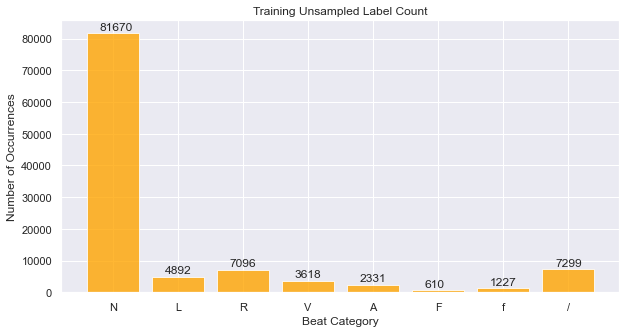

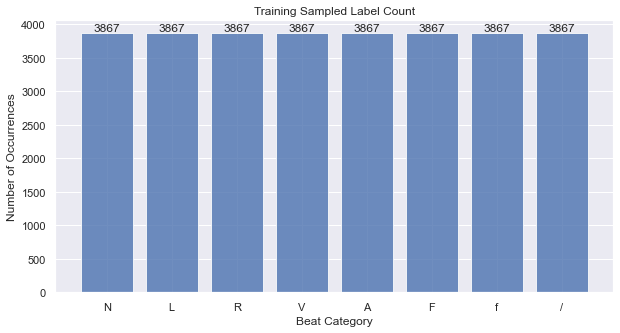

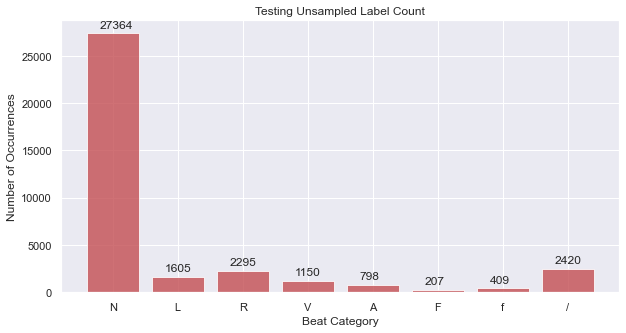

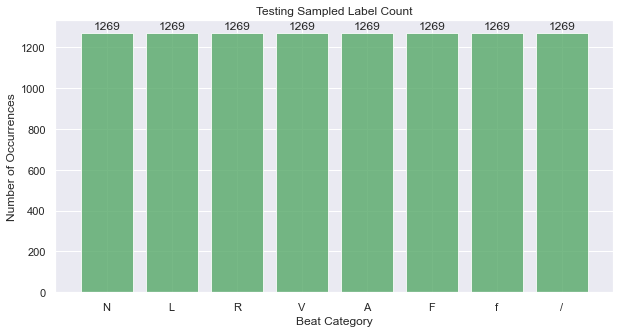

In [62]:
feature_names = ['N','L','R','V','A','F','f','/']

dftrain = pd.DataFrame(train)
countstrain = dftrain[187].value_counts()

plt.figure(figsize=(10,5))
barplt = plt.bar(countstrain.index, countstrain.values, alpha=0.8, color='orange')
plt.title('Training Unsampled Label Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Beat Category', fontsize=12)
plt.xticks(ticks=[1,2,3,4,5,6,7,8],labels=feature_names)
for bar in barplt:
    yval = bar.get_height()
    plt.text(bar.get_x()+.2, yval+1000, yval)
plt.show()

df_sampled = pd.DataFrame(train_sampled_all)
counts = df_sampled[187].value_counts()

plt.figure(figsize=(10,5))
barplt = plt.bar(counts.index, counts.values, alpha=0.8, color='b')
plt.title('Training Sampled Label Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Beat Category', fontsize=12)
plt.xticks(ticks=[1,2,3,4,5,6,7,8],labels=feature_names)
for bar in barplt:
    yval = bar.get_height()
    plt.text(bar.get_x()+.2, yval+30, yval)
plt.show()

dftest = pd.DataFrame(test)
countstest = dftest[187].value_counts()

plt.figure(figsize=(10,5))
barplt = plt.bar(countstest.index, countstest.values, alpha=0.8, color='r')
plt.title('Testing Unsampled Label Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Beat Category', fontsize=12)
plt.xticks(ticks=[1,2,3,4,5,6,7,8],labels=feature_names)
for bar in barplt:
    yval = bar.get_height()
    plt.text(bar.get_x()+.2, yval+600, yval)
plt.show()

dftest_sampled = pd.DataFrame(test_sampled_all)
countstestsam = dftest_sampled[187].value_counts()

plt.figure(figsize=(10,5))
barplt = plt.bar(countstestsam.index, countstestsam.values, alpha=0.8, color='g')
plt.title('Testing Sampled Label Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Beat Category', fontsize=12)
plt.xticks(ticks=[1,2,3,4,5,6,7,8],labels=feature_names)
for bar in barplt:
    yval = bar.get_height()
    plt.text(bar.get_x()+.2, yval+20, yval)
plt.show()

In [ ]:
# import numpy as np
# import glob

# train_values = np.empty(shape=[0, 189])
# test_values = np.empty(shape=[0, 189]) 
# train_sampled_all = glob.glob('./train_sampled_all.csv')
# test_all = glob.glob('./test_all.csv')

# for j in train_sampled_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     train_values = np.append(train_values, csvrows, axis=0)
    
# for j in test_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)
    
# print(train_values.shape)
# print(test_values.shape)

In [ ]:
# X_train = train_values[:,:-2]
# X_test = test_values[:,:-2]

# y_train = train_values[:,-2]
# y_test = test_values[:,-2]

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# # using gradient boost classifier
# from sklearn.ensemble import GradientBoostingClassifier
# gbc_clf = GradientBoostingClassifier(n_estimators=10,random_state=48)
# gbc_clf.fit(X_train, y_train)
# print('Gradient Boosting Results')
# y_pred_gbc = gbc_clf.predict(X_test)
# print(gbc_clf.score(X_test,y_test))

# # using adaboost classifier
# from sklearn.ensemble import AdaBoostClassifier
# ada_clf = AdaBoostClassifier(n_estimators=10,random_state=48)
# ada_clf.fit(X_train, y_train)
# print('Ada Boosting Results')
# y_pred_ada = ada_clf.predict(X_test)
# print(ada_clf.score(X_test,y_test))

# # using random forest classifier
# from sklearn.ensemble import RandomForestClassifier
# rfc_clf = RandomForestClassifier(max_depth=10, random_state=48,n_estimators=10)
# rfc_clf.fit(X_train, y_train)
# print('Random Forest Results')
# y_pred_rfc = rfc_clf.predict(X_test)
# print(rfc_clf.score(X_test, y_test))

# # using naive bayes
# from sklearn.naive_bayes import GaussianNB
# NB_clf = GaussianNB()
# NB_clf.fit(X_train, y_train)
# print('Naive Bayes Results')
# y_pred_NB = NB_clf.predict(X_test)
# print(NB_clf.score(X_test, y_test))

# # using NN Multi Layer Perceptron classifier
# from sklearn.neural_network import MLPClassifier
# NNMLP_clf = MLPClassifier(random_state=48, max_iter=50)
# NNMLP_clf.fit(X_train, y_train)
# print('NNMLP Results')
# y_pred_NNMLP = NNMLP_clf.predict(X_test)
# print(NNMLP_clf.score(X_test, y_test))

# #support vector classifier
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# svc_clf.fit(X_train, y_train)
# print('Support Vector Results')
# y_pred_svc = svc_clf.predict(X_test)
# print(svc_clf.score(X_test,y_test))

In [ ]:
# import seaborn as sns
# from sklearn.metrics import *
# import matplotlib.pyplot as plt

# gbc_cf_m = confusion_matrix(y_test,y_pred_gbc)
# gbc_cf_m = gbc_cf_m.astype('float')/ gbc_cf_m.sum(axis=1)[:,np.newaxis]
# gbc_pr_s = precision_score(y_test,y_pred_gbc,average='weighted')

# ada_cf_m = confusion_matrix(y_test,y_pred_ada)
# ada_pr_s = precision_score(y_test,y_pred_ada,average='weighted')

# rfc_cf_m = confusion_matrix(y_test,y_pred_rfc)
# rfc_pr_s = precision_score(y_test,y_pred_rfc,average='weighted')

# NB_cf_m = confusion_matrix(y_test,y_pred_NB)
# NB_pr_s = precision_score(y_test,y_pred_NB,average='weighted')

# NNMLP_cf_m = confusion_matrix(y_test,y_pred_NNMLP)
# NNMLP_pr_s = precision_score(y_test,y_pred_NNMLP,average='weighted')

# svc_cf_m = confusion_matrix(y_test,y_pred_svc)
# svc_pr_s = precision_score(y_test,y_pred_svc,average='weighted')

# plt.figure(figsize=(10,8))
# sns.heatmap(gbc_cf_m,annot=True,fmt='.2%')
# plt.title('GBC confusion matrix')
# plt.savefig('gbc_cfm.jpeg')

# plt.figure(figsize=(10,8))
# sns.heatmap(ada_cf_m/np.sum(ada_cf_m),annot=True,fmt='.2%')
# plt.title('ADA confusion matrix')
# plt.savefig('ada_cfm.jpeg')

# plt.figure(figsize=(10,8))
# sns.heatmap(rfc_cf_m/np.sum(rfc_cf_m),annot=True,fmt='.2%')
# plt.title('RFC confusion matrix')
# plt.savefig('rfc_cfm.jpeg')

# plt.figure(figsize=(10,8))
# sns.heatmap(NB_cf_m/np.sum(NB_cf_m),annot=True,fmt='.2%')
# plt.title('NB confusion matrix')
# plt.savefig('NB_cfm.jpeg')

# plt.figure(figsize=(10,8))
# sns.heatmap(NNMLP_cf_m/np.sum(NNMLP_cf_m),annot=True,fmt='.2%')
# plt.title('NNMLP confusion matrix')
# plt.savefig('NNMLP_cfm.jpeg')

# plt.figure(figsize=(10,8))
# sns.heatmap(svc_cf_m/np.sum(svc_cf_m),annot=True,fmt='.2%')
# plt.title('SVC confusion matrix')
# plt.savefig('SVC_cfm.jpeg')

In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# xfit = clf.fit(X_train, y_train)
# clf.score(X_test,y_test)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

x_pca = PCA(n_components=50,random_state=42).fit_transform(X_train)

In [ ]:
x_tsne = TSNE(n_components=3,random_state=42,perplexity=50).fit_transform(x_pca)

In [ ]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(x_tsne[:,0],x_tsne[:,1], c=y_train)
plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')

In [ ]:
# ax = plt.figure(figsize=(16,16)).gca(projection='3d')
# ax.scatter(
#     xs=x_tsne[:,0],
#     ys=x_tsne[:,1],
#     zs=x_tsne[:,2],
#     c=y_train,
#     cmap='tab10'
# )
# ax.set_xlabel('pca-one')
# ax.set_ylabel('pca-two')
# ax.set_zlabel('pca-three')
# plt.show()

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import umap

# x_pca = PCA(n_components=2,random_state=42).fit_transform(X_train)
# x_tsne = TSNE(n_components=2,random_state=42,perplexity=50).fit_transform(x_pca)
# x_umap = umap.UMAP().fit_transform(X_train)

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15,15))
# scatter = plt.scatter(x_tsne[:,0],x_tsne[:,1], c=y_train)
# plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')

In [ ]:
# from sklearn.model_selection import LeaveOneGroupOut

# def leave_one_patient():
#     x = values[:,:-2]
#     y = values[:,-2]
#     groups = values[:,-1]
#     lopo = LeaveOneGroupOut()
#     lopo.get_n_splits(x,y,groups)
#     x_train = []
#     x_test = []
#     y_train = []
#     y_test = []
#     for train_index, test_index in lopo.split(x,y,groups):
#         x_tr, x_te = x[train_index], x[test_index]
#         y_tr, y_te = y[train_index], y[test_index]
#         x_train.append(x_tr)
#         x_test.append(x_te)
#         y_train.append(y_tr)
#         y_test.append(y_te)

#     return x_train, x_test, y_train, y_test

# x_train, x_test, y_train, y_test = leave_one_patient()